In [1]:
import pandas as pd
import seaborn as sns
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rc('font', family='sans-serif')
matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rc('pdf', fonttype=42)



/home/jchart/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/jchart/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


    Well  Sample     NRFU1         RFU1        Cq1     NRFU2         RFU2  \
NaN  A02     3:1  0.345329   952.167969  29.093915  0.654791  1805.441722   
NaN  A03     2:1  0.385871   903.757326  28.954151  0.614270  1438.698335   
NaN  A04   1.5:1  0.430087  1234.630976  28.370913  0.570028  1636.352663   
NaN  A05  1.25:1  0.451821  1362.020895  28.015951  0.548288  1652.823430   
NaN  A06   1.1:1  0.467696  1486.558727  27.802812  0.532407  1692.239973   
NaN  A07   1:1.1  0.497921  1577.295510  27.720597  0.502183  1590.797286   
NaN  A08  1:1.25  0.525110  1566.836708  27.573699  0.475000  1417.317941   
NaN  A09   1:1.5  0.550607  1667.546133  27.347502  0.449502  1361.345876   
NaN  A10     1:2  0.565636  1757.297191  27.441858  0.434470  1349.793527   
NaN  A11     1:3  0.624695  1783.568550  27.301046  0.375420  1071.863763   
NaN  B02     3:1  0.369402  1116.692643  28.431118  0.630707  1906.610881   
NaN  B03     2:1  0.407412  1153.756587  28.068695  0.592705  1678.490699   

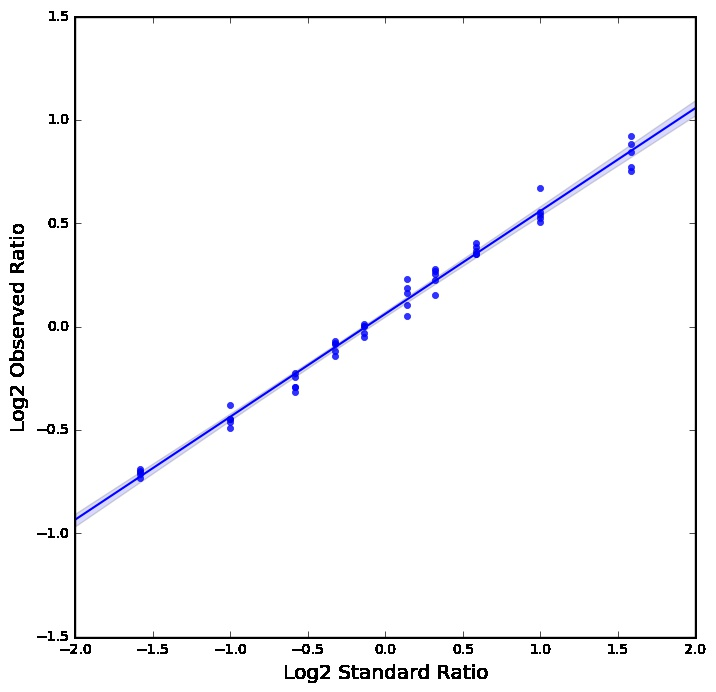

In [2]:
tqmn = pd.read_excel('TaqMan_gDNA_091517/091517_taqman_gDNA_2 -  Allelic Discrimination Results.xlsx')
sample_prop_dict = {
    '3:1' : 3./1,
    '2:1' : 2./1,
    '1.5:1' : 1.5/1,
    '1.25:1' : 1.25/1,
    '1.1:1' : 1.1/1,
    '1:1.1' : 1/1.1,
    '1:1.25' : 1/1.25,
    '1:1.5' : 1/1.5,
    '1:2' : 1/2.,
    '1:3' : 1/3.
}

for key in sample_prop_dict:
    old_val = sample_prop_dict[key]
    sample_prop_dict[key] = math.log(old_val,2)

test_samples = tqmn.loc[tqmn['Sample'].isin(sample_prop_dict.keys()),:]
test_samples['true_log_prop'] = map(lambda x: sample_prop_dict[x],test_samples.Sample)

test_samples['measued_log_prop'] = np.log2(test_samples.NRFU2/test_samples.NRFU1)
print test_samples
plt.figure(figsize=(8,8))
ax = sns.regplot('true_log_prop','measued_log_prop',data=test_samples)

ax.set_xlabel('Log2 Standard Ratio',fontsize='x-large')
ax.set_ylabel('Log2 Observed Ratio',fontsize='x-large')
#plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/TaqMan_standard_curve.pdf')


a= test_samples.loc[test_samples['Sample'] == '1.1:1']['measued_log_prop']
b= test_samples.loc[test_samples['Sample'] == '1.25:1']['measued_log_prop']
print stats.mannwhitneyu(a,b)
print stats.ttest_ind(a,b)



c= test_samples.loc[test_samples['Sample'] == '1:1.1']['measued_log_prop']
d= test_samples.loc[test_samples['Sample'] == '1:1.25']['measued_log_prop']
print stats.mannwhitneyu(b,c)
print stats.ttest_ind(b,c)

print stats.mannwhitneyu(c,d)
print stats.ttest_ind(c,d)

print stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
calibrated_slope,intercept,r,p,stderr = stats.linregress(test_samples['true_log_prop'],test_samples['measued_log_prop'])
print calibrated_slope

MannwhitneyuResult(statistic=67.0, pvalue=0.0099608087192111852)
MannwhitneyuResult(statistic=161.0, pvalue=0.006070392862189463)
MannwhitneyuResult(statistic=93.0, pvalue=0.0017689682391110525)
MannwhitneyuResult(statistic=174.0, pvalue=0.012215465454991413)
MannwhitneyuResult(statistic=93.0, pvalue=0.062187552745400977)
MannwhitneyuResult(statistic=588.0, pvalue=9.9751800985257885e-05)


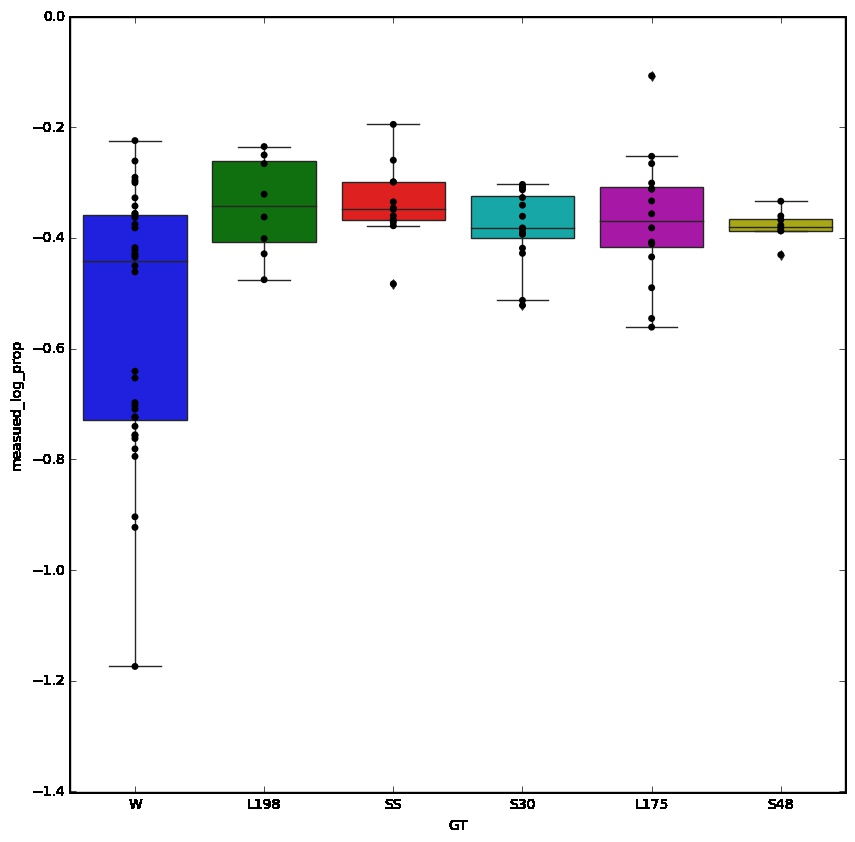

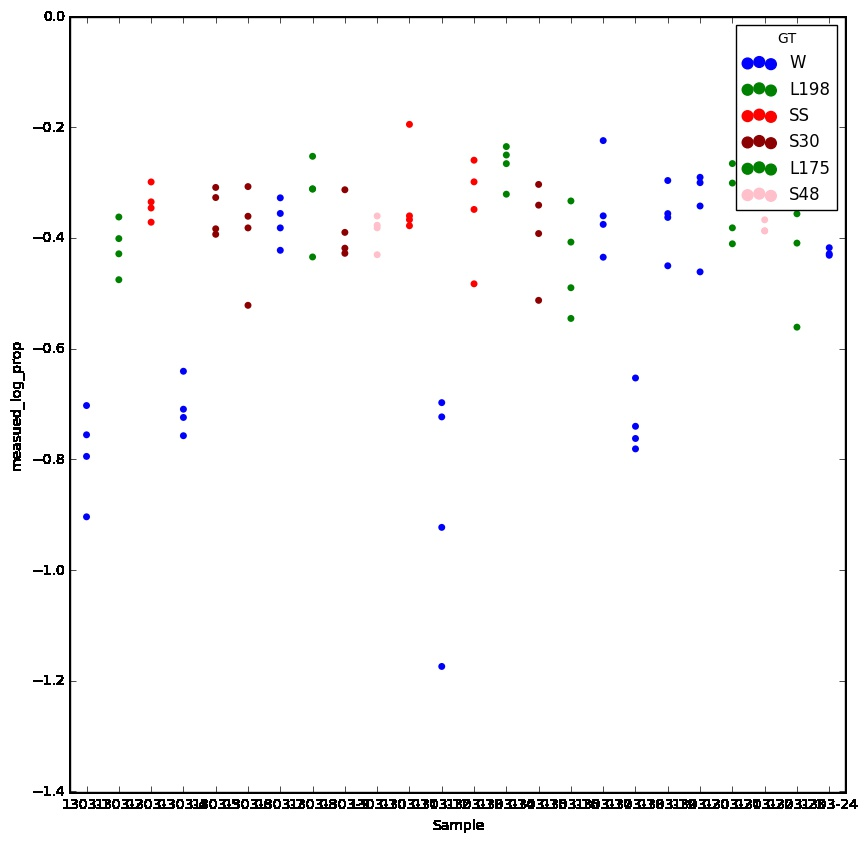

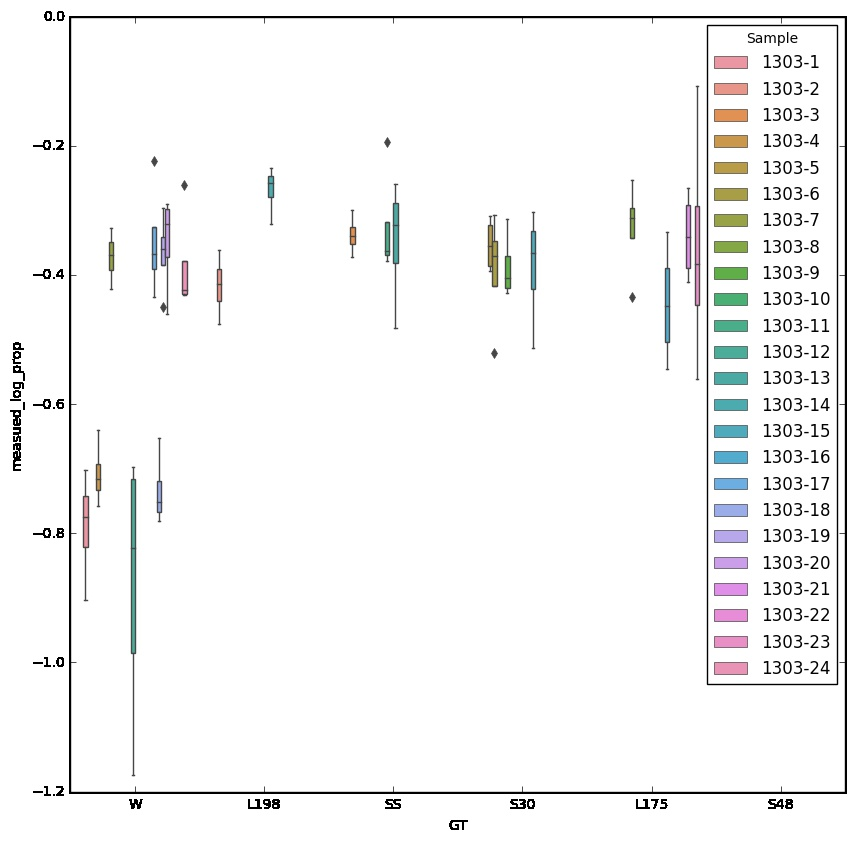

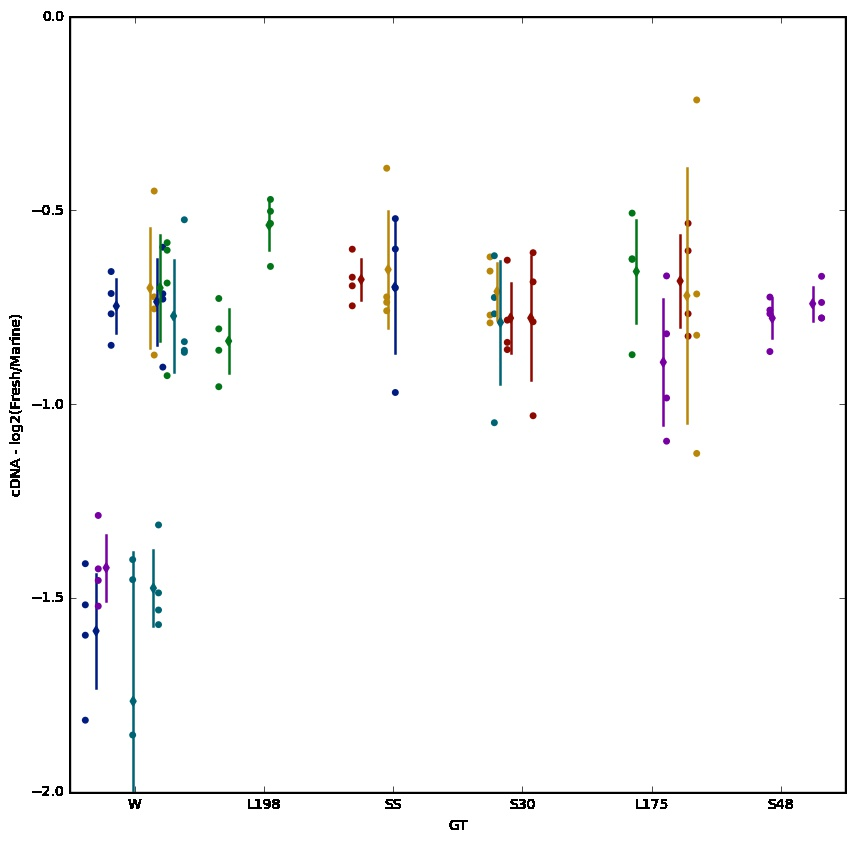

In [3]:
tqmn = pd.read_excel('TaqMan_cDNA_TG1303/91717_taqman_1303_cDNA -  Allelic Discrimination Results.xlsx')
tqmn['measued_log_prop'] = np.log2(tqmn.RFU2/tqmn.RFU1)

tqmn['true_log_prop'] = tqmn['measued_log_prop']/calibrated_slope
#tqmn = tqmn.tail(n=24)

gt_palette = {
    'W' : 'blue',
    'SS' : 'red',
    'S30' : 'darkred',
    'S48' : 'pink',
    'L175' : 'green',
    'L198' : 'green'
}

plt.figure(figsize=(10,10))
sns.stripplot(x='GT',y='measued_log_prop',data=tqmn,color='black')
sns.boxplot(x='GT',y='measued_log_prop',data=tqmn)

plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='measued_log_prop',hue='GT',data=tqmn,palette = gt_palette)
plt.figure(figsize=(10,10))
sns.boxplot(x='GT',y='measued_log_prop',hue='Sample',data=tqmn)

#tqmn_1303_gDNA = tqmn.loc[tqmn['Sample_Type'] == 'gDNA']
#tqmn_1303_cDNA = tqmn.loc[tqmn['Sample_Type'] == 'cDNA']

wt = tqmn.loc[tqmn['GT'] == 'W','measued_log_prop']
L198 = tqmn.loc[tqmn['GT'] == 'L198','measued_log_prop']
L175 = tqmn.loc[tqmn['GT'] == 'L175','measued_log_prop']
SS = tqmn.loc[tqmn['GT'] == 'SS','measued_log_prop']
S30 = tqmn.loc[tqmn['GT'] == 'S30','measued_log_prop']
S48 = tqmn.loc[tqmn['GT'] == 'S48','measued_log_prop']
mut = tqmn.loc[tqmn['GT'] != 'W','measued_log_prop']


plt.figure(figsize=(10,10))


ax=sns.pointplot(x="GT", y="true_log_prop", hue="Sample",
              data=tqmn, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')
sns.stripplot(x='GT',y='true_log_prop',hue='Sample',
              data=tqmn,dodge=True,palette='dark')
ax.legend_.remove()
ax.set_ylim((-2,0))
ax.set_ylabel('cDNA - log2(Fresh/Marine)')

print stats.mannwhitneyu(wt,L198)
print stats.mannwhitneyu(wt,L175)
print stats.mannwhitneyu(wt,SS)
print stats.mannwhitneyu(wt,S30)
print stats.mannwhitneyu(wt,S48)
print stats.mannwhitneyu(wt,mut)


Ttest_indResult(statistic=12.709938211094061, pvalue=1.7112438045126971e-16)
MannwhitneyuResult(statistic=0.0, pvalue=2.2724891574818623e-09)
               sum_sq    df           F        PR(>F)
Sample_Type  0.200994   1.0  156.990046  1.138522e-13
Sample       0.717381  15.0   37.354866  1.185236e-15
Residual     0.039689  31.0         NaN           NaN
             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  true_log_prop
No. Observations:   47       Method:              REML         
No. Groups:         16       Scale:               0.0052       
Min. group size:    2        Likelihood:          37.5277      
Max. group size:    3        Converged:           Yes          
Mean group size:    2.9                                        
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept      

(-1.25, 0.0)

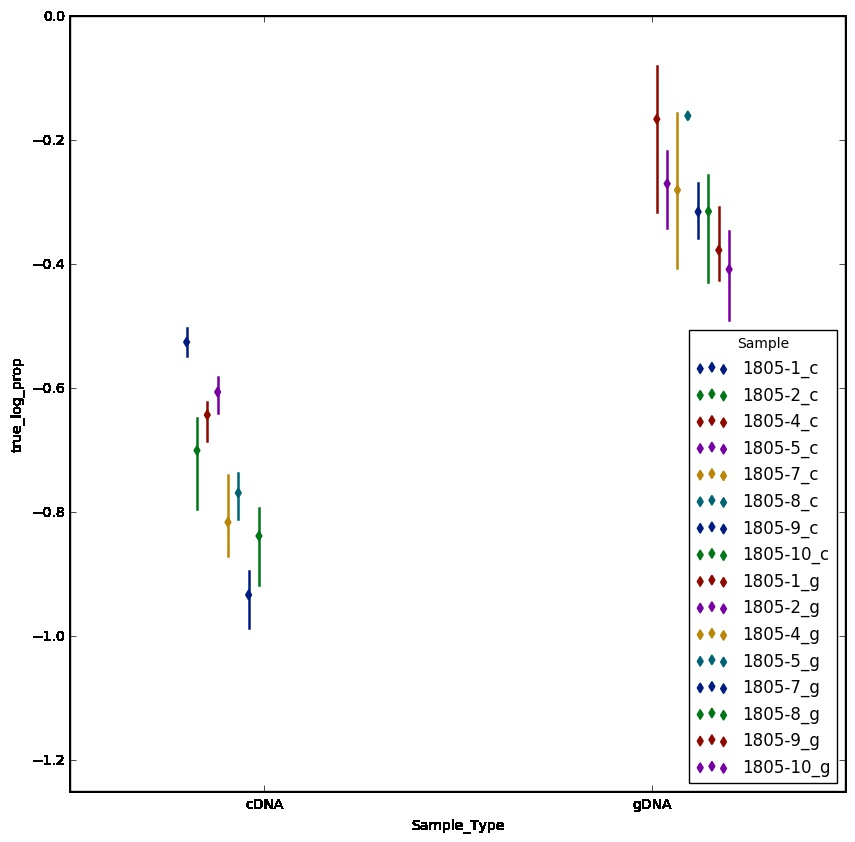

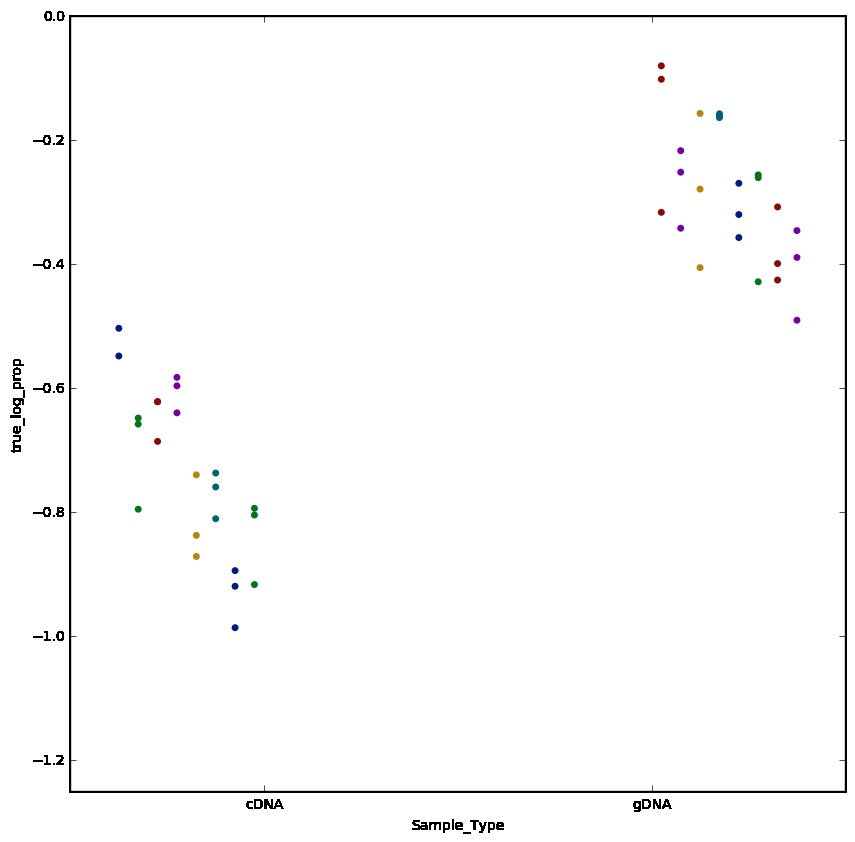

In [4]:
ftc_tqmn = pd.read_excel('TaqMan_cgDNA_1805/092217_taqman_fxl_1805 -  Allelic Discrimination Results.xlsx')
ftc_tqmn['measued_log_prop'] = np.log2(ftc_tqmn.RFU2/ftc_tqmn.RFU1)
ftc_tqmn.head

ftc_tqmn = ftc_tqmn.loc[ftc_tqmn['RFU1'] > 200]
ftc_tqmn = ftc_tqmn.loc[ftc_tqmn['RFU2'] > 200]
ftc_tqmn = ftc_tqmn.loc[ftc_tqmn['measued_log_prop'] < 2]

ftc_tqmn['true_log_prop'] = ftc_tqmn['measued_log_prop']/calibrated_slope
ftc_tqmn.head
'''
plt.figure(figsize=(10,10))
sns.stripplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn,color='black')
sns.boxplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn)


plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=ftc_tqmn)
plt.figure(figsize=(10,10))
sns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=ftc_tqmn)
'''

ftc_gDNA_ratios = ftc_tqmn.loc[ftc_tqmn['Sample_Type'] == 'gDNA']['true_log_prop']
ftc_cDNA_ratios = ftc_tqmn.loc[ftc_tqmn['Sample_Type'] == 'cDNA']['true_log_prop']
ftc_gDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type'] == 'gDNA']
ftc_cDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type'] == 'cDNA']

print stats.ttest_ind(ftc_gDNA_ratios,ftc_cDNA_ratios)
print stats.mannwhitneyu(ftc_gDNA_ratios,ftc_cDNA_ratios)

##Super significant!
model = smf.ols(formula="measued_log_prop ~ Sample_Type+Sample", data=ftc_tqmn).fit()
model.summary()

plt.figure(figsize=(10,10))


ax=sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=ftc_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
ax.set_ylim((-1.25))
aov_table = sm.stats.anova_lm(model, typ=2)
print aov_table


md = smf.mixedlm("true_log_prop ~ Sample_Type", data=ftc_tqmn, groups=ftc_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())


plt.figure(figsize=(10,10))



ax=sns.stripplot(x='Sample_Type',y='true_log_prop',hue='Sample',
              data=ftc_tqmn,dodge=True,palette='dark')
ax.legend_.remove()
ax.set_ylim((-1.25))




"\nplt.figure(figsize=(10,10))\nsns.stripplot(x='Sample_Type',y='true_log_prop',data=tqmn_1339,color='black')\nsns.boxplot(x='Sample_Type',y='true_log_prop',data=tqmn_1339)\n\n\nplt.figure(figsize=(10,10))\nsns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=tqmn_1339)\nplt.figure(figsize=(10,10))\nsns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=tqmn_1339)\n\n\n\n\n\ngt_palette = {\n    'WT' : 'blue',\n    'SS' : 'purple',\n    'SM' : 'red',\n    'delL' : 'green',\n}\n\nplt.figure(figsize=(6,6))\nsns.stripplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA,color='black')\nsns.boxplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA)\n\nplt.figure(figsize=(6,6))\nsns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1339_cDNA,palette = gt_palette)\nplt.figure(figsize=(6,6))\nsns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1339_cDNA)\n\nplt.figure(figsize=(6,6))\nsns.stripplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA,color='black')\nsns.box

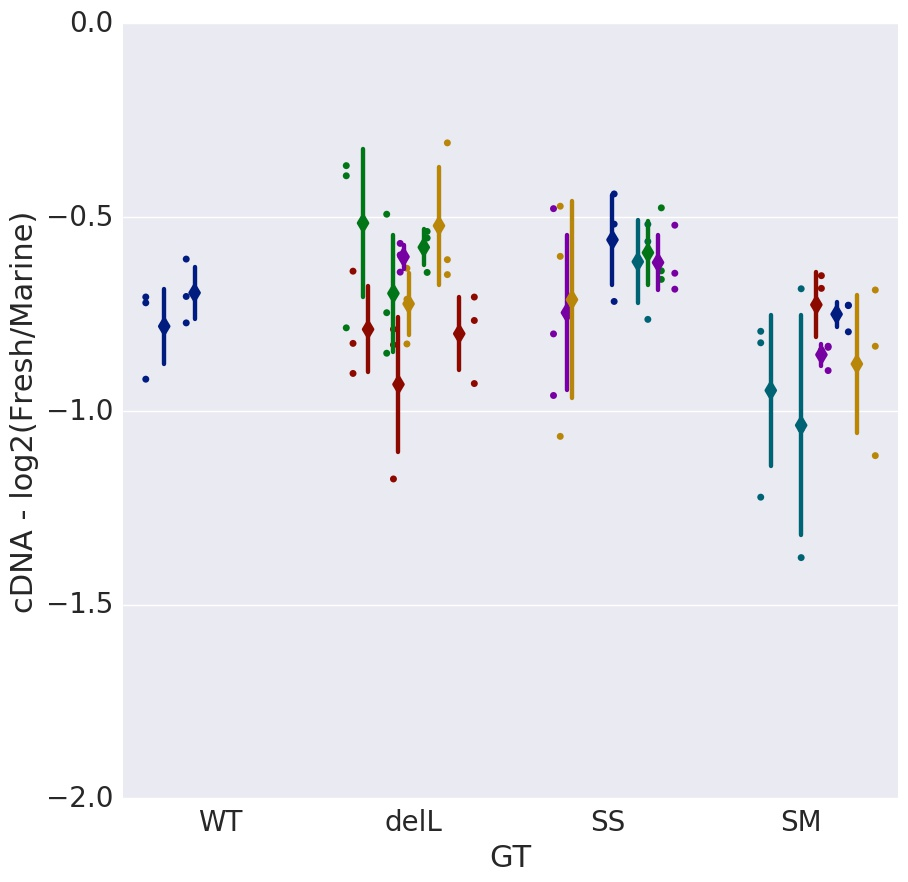

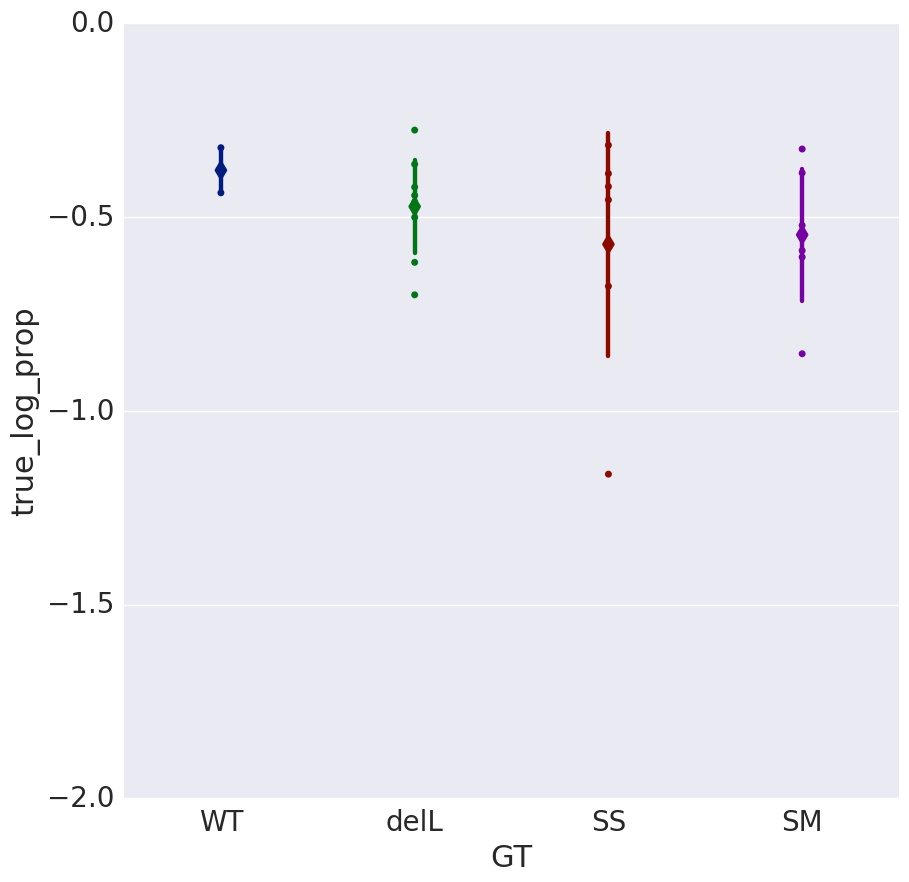

In [5]:
sns.set(font_scale=2) 

tqmn_1339 = pd.read_excel('TaqMan_cgDNA_1339/092617-taqman-1339_2 -  Allelic Discrimination Results.xlsx')
tqmn_1339['measued_log_prop'] = np.log2(tqmn_1339.RFU2/tqmn_1339.RFU1)
tqmn_1339.head

tqmn_1339 = tqmn_1339.loc[tqmn_1339['RFU1'] > 200]
tqmn_1339 = tqmn_1339.loc[tqmn_1339['RFU2'] > 200]

tqmn_1339.head

tqmn_1339['true_log_prop'] = tqmn_1339['measued_log_prop']/calibrated_slope
tqmn_1339_gDNA = tqmn_1339.loc[tqmn_1339['Sample_Type'] == 'gDNA']
tqmn_1339_cDNA = tqmn_1339.loc[tqmn_1339['Sample_Type'] == 'cDNA']

tqmn_1339_gDNA_ratios = tqmn_1339.loc[tqmn_1339['Sample_Type'] == 'gDNA']['true_log_prop']
tqmn_1339_cDNA_ratios = tqmn_1339.loc[tqmn_1339['Sample_Type'] == 'cDNA']['true_log_prop']
#print tqmn_1339_gDNA_ratios
#print 'ase'
#print stats.ttest_ind(tqmn_1339_gDNA_ratios,tqmn_1339_cDNA_ratios)
#print stats.mannwhitneyu(tqmn_1339_gDNA_ratios,tqmn_1339_cDNA_ratios)


plt.figure(figsize=(10,10))


ax=sns.pointplot(x="GT", y="true_log_prop", hue="Sample",
              data=tqmn_1339_cDNA, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')
sns.stripplot(x='GT',y='true_log_prop',hue='Sample',
              data=tqmn_1339_cDNA,dodge=True,palette='dark')
ax.legend_.remove()
ax.set_ylim((-2,0))
ax.set_ylabel('cDNA - log2(Fresh/Marine)')

plt.figure(figsize=(10,10))


ax=sns.pointplot(x="GT", y="true_log_prop", 
              data=tqmn_1339_gDNA, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')

sns.stripplot(x="GT", y="true_log_prop", 
              data=tqmn_1339_gDNA, dodge=True,palette='dark')

ax.set_ylim((-2,0))

'''
plt.figure(figsize=(10,10))
sns.stripplot(x='Sample_Type',y='true_log_prop',data=tqmn_1339,color='black')
sns.boxplot(x='Sample_Type',y='true_log_prop',data=tqmn_1339)


plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=tqmn_1339)
plt.figure(figsize=(10,10))
sns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=tqmn_1339)





gt_palette = {
    'WT' : 'blue',
    'SS' : 'purple',
    'SM' : 'red',
    'delL' : 'green',
}

plt.figure(figsize=(6,6))
sns.stripplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA,color='black')
sns.boxplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA)

plt.figure(figsize=(6,6))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1339_cDNA,palette = gt_palette)
plt.figure(figsize=(6,6))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1339_cDNA)

plt.figure(figsize=(6,6))
sns.stripplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA,color='black')
sns.boxplot(x='GT',y='true_log_prop',data=tqmn_1339_cDNA)

plt.figure(figsize=(6,6))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1339_cDNA,palette = gt_palette)
plt.figure(figsize=(6,6))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1339_cDNA)


plt.figure(figsize=(6,6))
sns.stripplot(x='GT',y='true_log_prop',data=tqmn_1339_gDNA,color='black')
sns.boxplot(x='GT',y='true_log_prop',data=tqmn_1339_gDNA)

plt.figure(figsize=(6,6))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1339_gDNA,palette = gt_palette)
plt.figure(figsize=(10,10))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1339_gDNA)

wt = tqmn_1339_cDNA.loc[tqmn_1339_cDNA['GT'] == 'WT','true_log_prop']
ss = tqmn_1339_cDNA.loc[tqmn_1339_cDNA['GT'] == 'SS','true_log_prop']
sm = tqmn_1339_cDNA.loc[tqmn_1339_cDNA['GT'] == 'SM','true_log_prop']
dell = tqmn_1339_cDNA.loc[tqmn_1339_cDNA['GT'] == 'delL','true_log_prop']

print stats.f_oneway(wt,ss,sm,dell)
'''

               sum_sq    df          F    PR(>F)
Sample_Type  0.103732   1.0  37.033101  0.000009
Sample       0.275735  11.0   8.949017  0.000031
Residual     0.050419  18.0        NaN       NaN
             Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  true_log_prop
No. Observations:  30       Method:              REML         
No. Groups:        12       Scale:               0.0111       
Min. group size:   2        Likelihood:          12.7257      
Max. group size:   3        Converged:           Yes          
Mean group size:   2.5                                        
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           -0.560    0.059 -9.453 0.000 -0.676 -0.444
Sample_Type[T.gDNA]  0.267    0.086  3.115 0.002  0.099  0.434
Intercept RE         0.017    0.129                         

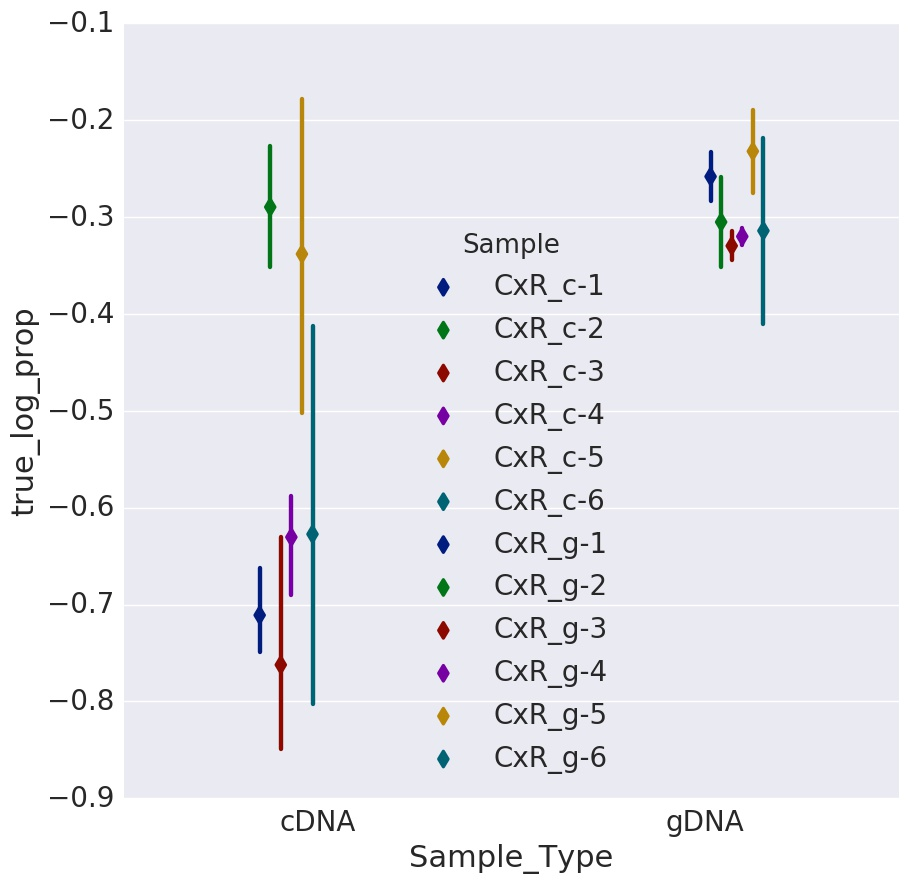

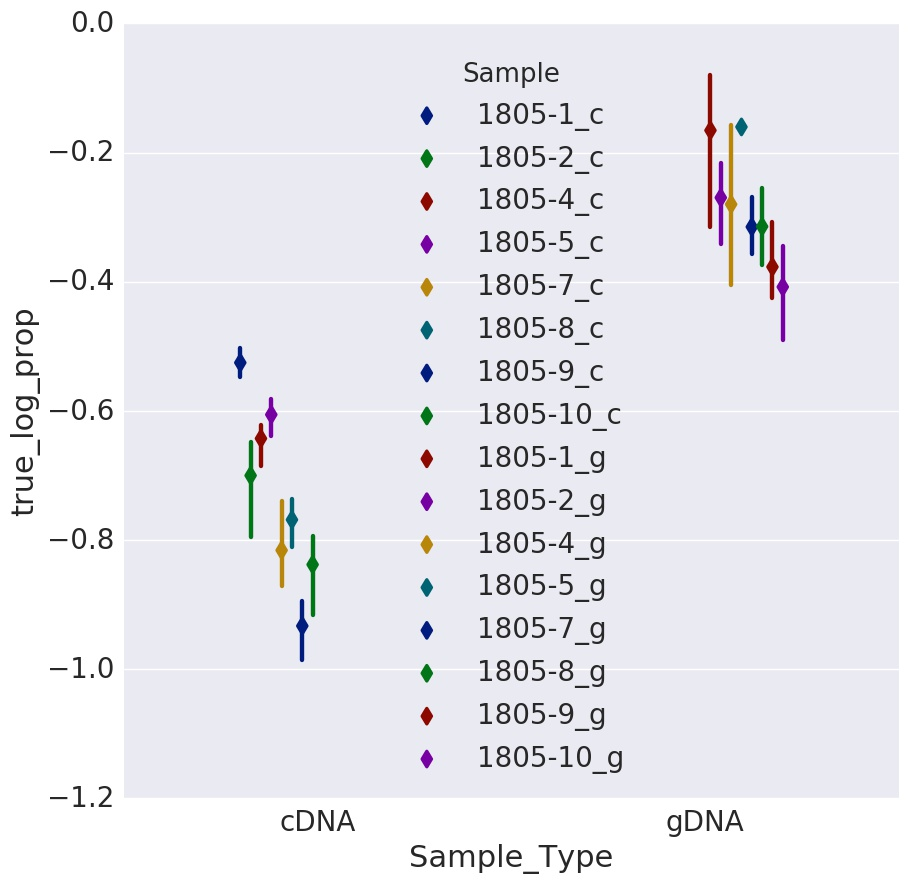

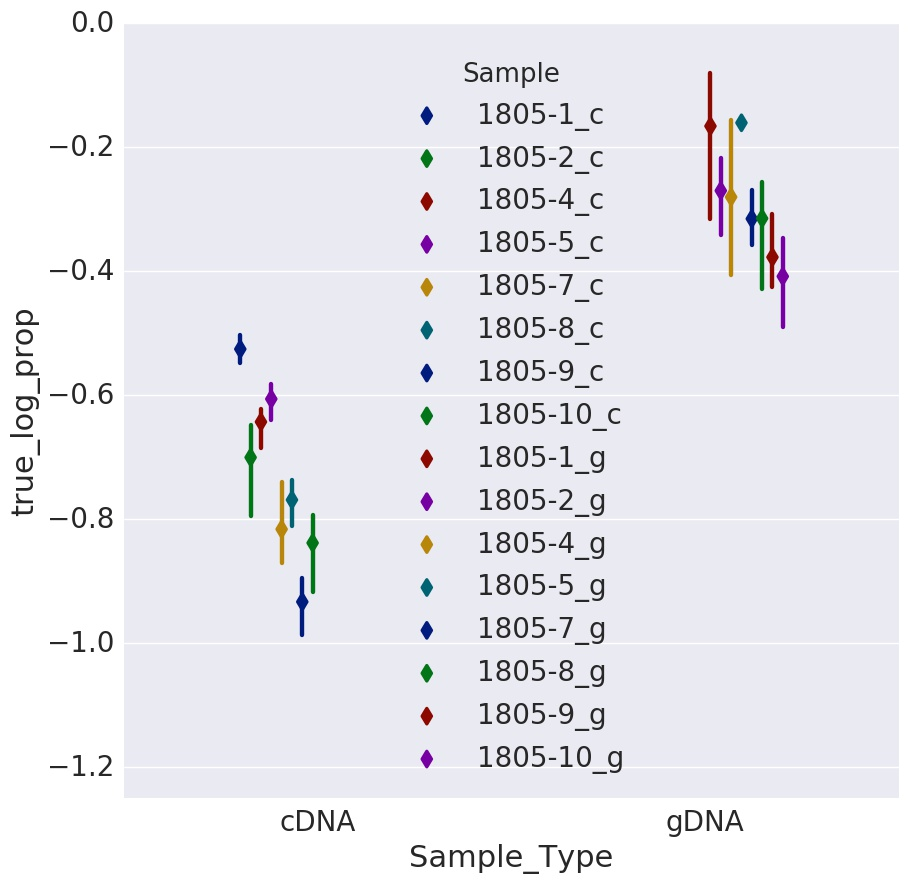

In [6]:
cerc1_tqmn = pd.read_excel('CxR-102017/CxR_041416_tqmn_102017 -  Allelic Discrimination Results.xlsx')
cerc1_tqmn['measued_log_prop'] = np.log2(cerc1_tqmn.RFU2/cerc1_tqmn.RFU1)

cerc1_tqmn = cerc1_tqmn.loc[cerc1_tqmn['RFU1'] > 200]
cerc1_tqmn = cerc1_tqmn.loc[cerc1_tqmn['RFU2'] > 200]
#cer1c_tqmn = cerc_tqmn.loc[cerc_tqmn['N'] < 25]

cerc1_tqmn['true_log_prop'] = cerc1_tqmn['measued_log_prop']/calibrated_slope
cerc1_tqmn.head
'''
plt.figure(figsize=(10,10))
sns.stripplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn,color='black')
sns.boxplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn)


plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=ftc_tqmn)
plt.figure(figsize=(10,10))
sns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=ftc_tqmn)
'''

cerc1_gDNA_ratios = cerc1_tqmn.loc[cerc1_tqmn['Sample_Type'] == 'gDNA']['true_log_prop']
cerc1_cDNA_ratios = cerc1_tqmn.loc[cerc1_tqmn['Sample_Type'] == 'cDNA']['true_log_prop']

#print stats.ttest_ind(cerc_gDNA_ratios,cerc_cDNA_ratios)
#print stats.mannwhitneyu(cerc_gDNA_ratios,cerc_cDNA_ratios)

##Super significant!
model = smf.ols(formula="measued_log_prop ~ C(Sample_Type)+C(Sample)", data=cerc1_tqmn).fit()
#print model.summary()

plt.figure(figsize=(10,10))


sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=cerc1_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
plt.figure(figsize=(10,10))

sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=ftc_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
model = smf.ols(formula="measued_log_prop ~ Sample_Type+Sample", data=cerc1_tqmn).fit()
model.summary()

plt.figure(figsize=(10,10))


ax=sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=ftc_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
ax.set_ylim((-1.25))
aov_table = sm.stats.anova_lm(model, typ=2)
print aov_table
#aov_table = sm.stats.anova_lm(model, typ=2)
#print aov_table
data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

mdf = md.fit()

#print(mdf.summary())
#print data['Pig']

#print cerc_tqmn
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=cerc1_tqmn, groups=cerc1_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())


/home/jchart/anaconda2/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:1717: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  true_log_prop
No. Observations:   24       Method:              REML         
No. Groups:         12       Scale:               0.0050       
Min. group size:    1        Likelihood:          21.0352      
Max. group size:    3        Converged:           Yes          
Mean group size:    2.0                                        
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -0.488    0.028 -17.503 0.000 -0.542 -0.433
Sample_Type[T.gDNA]  0.113    0.046   2.468 0.014  0.023  0.203
Intercept RE         0.003    0.045                            



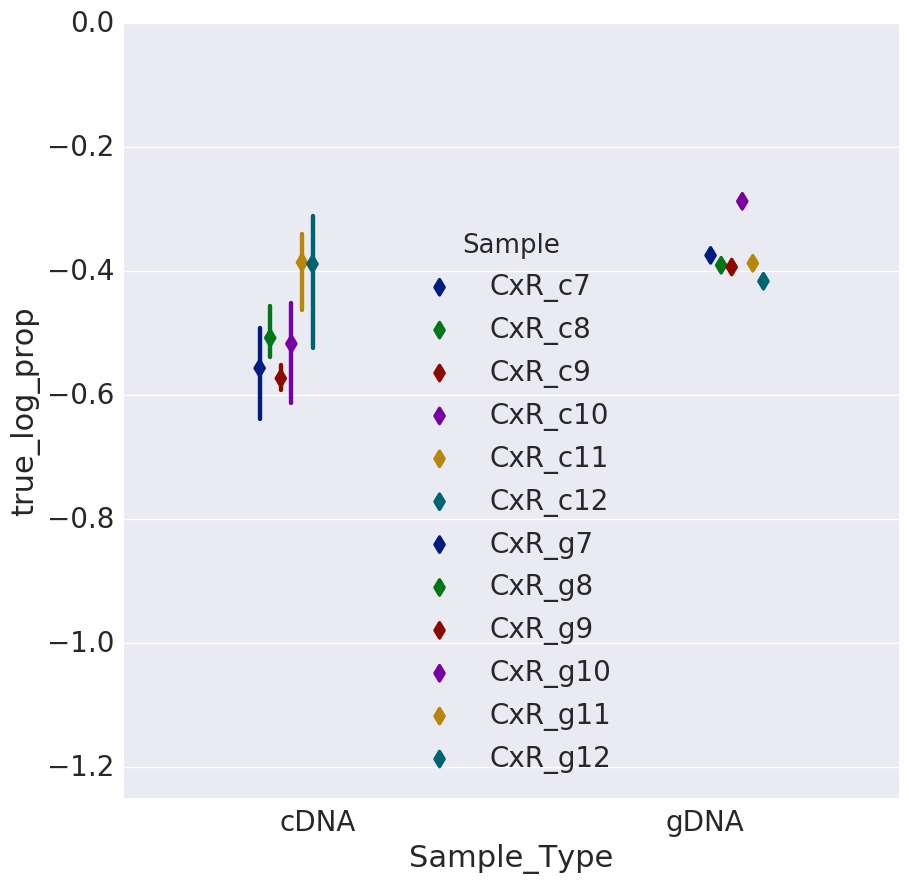

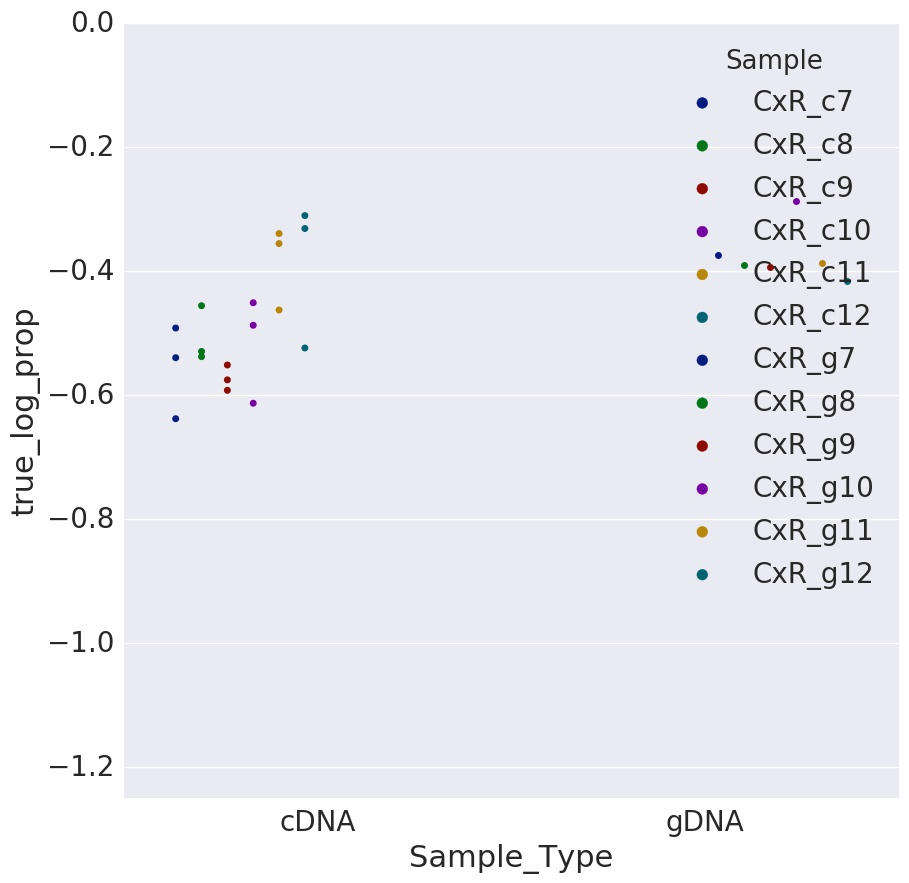

In [7]:
cerc_tqmn = pd.read_excel('CxR_7-12_102317/CxR7to12_041416_tqmn_102317 -  Allelic Discrimination Results.xlsx')
cerc_tqmn['measued_log_prop'] = np.log2(cerc_tqmn.RFU2/cerc_tqmn.RFU1)

cerc_tqmn = cerc_tqmn.loc[cerc_tqmn['RFU1'] > 200]
cerc_tqmn = cerc_tqmn.loc[cerc_tqmn['RFU2'] > 200]
#cerc_tqmn = cerc_tqmn.loc[cerc_tqmn['N'] < 25]

cerc_tqmn['true_log_prop'] = cerc_tqmn['measued_log_prop']/calibrated_slope
cerc_tqmn.head
'''
plt.figure(figsize=(10,10))
sns.stripplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn,color='black')
sns.boxplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn)


plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=ftc_tqmn)
plt.figure(figsize=(10,10))
sns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=ftc_tqmn)
'''

cerc_gDNA_ratios = cerc_tqmn.loc[cerc_tqmn['Sample_Type'] == 'gDNA']['true_log_prop']
cerc_cDNA_ratios = cerc_tqmn.loc[cerc_tqmn['Sample_Type'] == 'cDNA']['true_log_prop']

#print stats.ttest_ind(cerc_gDNA_ratios,cerc_cDNA_ratios)
#print stats.mannwhitneyu(cerc_gDNA_ratios,cerc_cDNA_ratios)

##Super significant!
model = smf.ols(formula="measued_log_prop ~ C(Sample_Type)+C(Sample)", data=cerc_tqmn).fit()
#print model.summary()

plt.figure(figsize=(10,10))


ax=sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=cerc_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
ax.set_ylim((-1.25,0))

plt.figure(figsize=(10,10))

ax=sns.stripplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=cerc_tqmn, dodge=True,palette='dark')
ax.set_ylim((-1.25,0))

#aov_table = sm.stats.anova_lm(model, typ=2)
#print aov_table
data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

mdf = md.fit()

#print(mdf.summary())
#print data['Pig']

#print cerc_tqmn
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=cerc_tqmn, groups=cerc_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())

/home/jchart/anaconda2/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:1717: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  true_log_prop
No. Observations:   24       Method:              REML         
No. Groups:         8        Scale:               0.0482       
Min. group size:    3        Likelihood:          -0.3418      
Max. group size:    3        Converged:           Yes          
Mean group size:    3.0                                        
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -1.974    0.063 -31.152 0.000 -2.098 -1.850
Sample_Type[T.gDNA]  1.595    0.090  17.796 0.000  1.419  1.770
Intercept RE         0.000    0.074                            



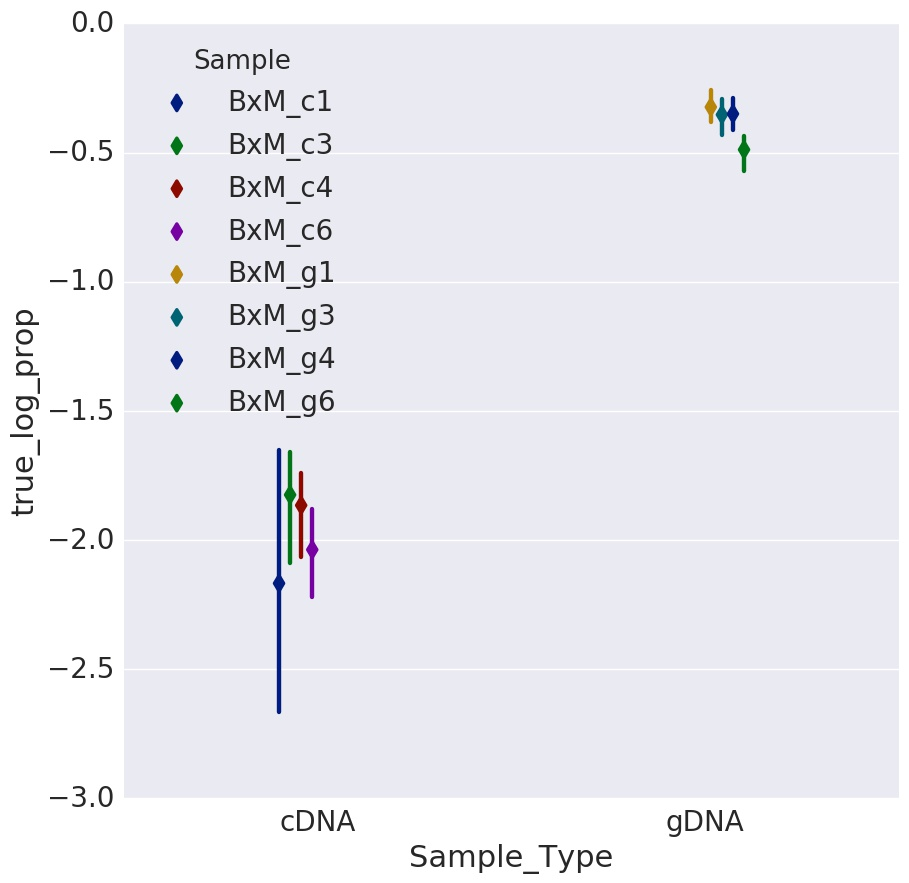

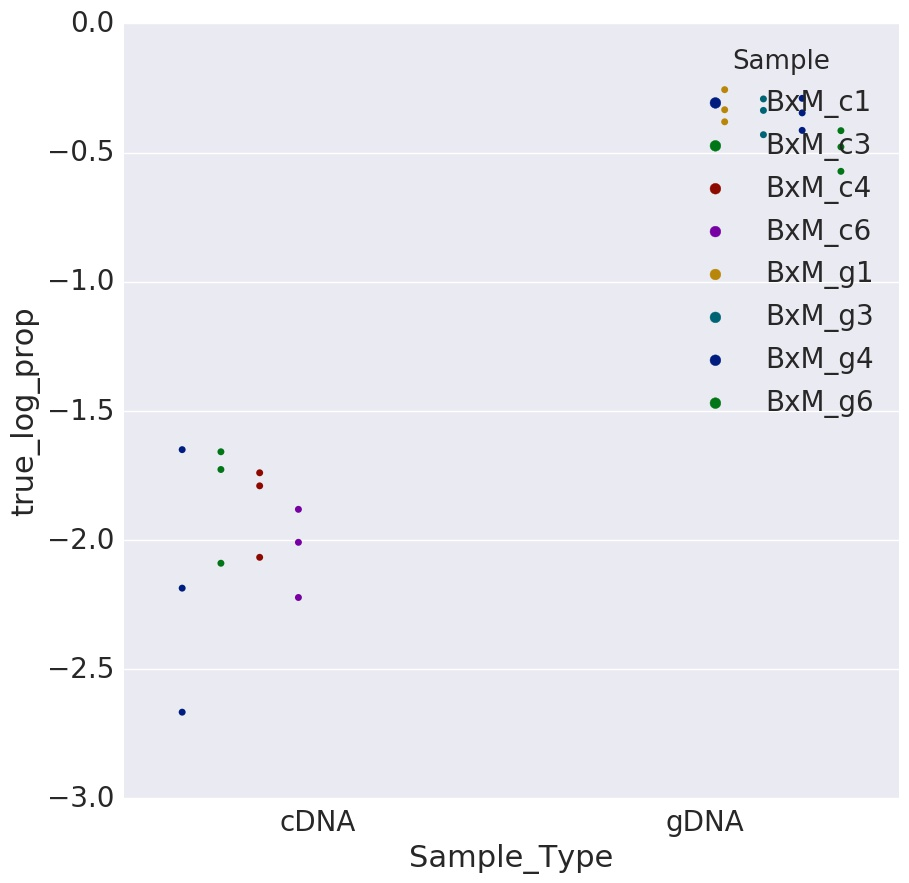

In [8]:
MxB_tqmn = pd.read_csv('BxM_Taqman/BxM_bmp6_tqmn_012518 -  Allelic Discrimination Results_ADSheet_filtered.csv')
MxB_tqmn['measued_log_prop'] = np.log2(MxB_tqmn.RFU2/MxB_tqmn.RFU1)

MxB_tqmn = MxB_tqmn.loc[MxB_tqmn['RFU1'] > 50]
MxB_tqmn = MxB_tqmn.loc[MxB_tqmn['RFU2'] > 50]
#cerc_tqmn = cerc_tqmn.loc[cerc_tqmn['N'] < 25]

MxB_tqmn['true_log_prop'] = MxB_tqmn['measued_log_prop']/calibrated_slope
MxB_tqmn.head
'''
plt.figure(figsize=(10,10))
sns.stripplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn,color='black')
sns.boxplot(x='Sample_Type',y='true_log_prop',data=ftc_tqmn)


plt.figure(figsize=(10,10))
sns.stripplot(x='Sample',y='true_log_prop',hue='Sample_Type',data=ftc_tqmn)
plt.figure(figsize=(10,10))
sns.boxplot(x='Sample_Type',y='true_log_prop',hue='Sample',data=ftc_tqmn)
'''

MxB_gDNA_ratios = MxB_tqmn.loc[MxB_tqmn['Sample_Type'] == 'gDNA']['true_log_prop']
MxB_cDNA_ratios = MxB_tqmn.loc[MxB_tqmn['Sample_Type'] == 'cDNA']['true_log_prop']

#print stats.ttest_ind(cerc_gDNA_ratios,cerc_cDNA_ratios)
#print stats.mannwhitneyu(cerc_gDNA_ratios,cerc_cDNA_ratios)

##Super significant!
model = smf.ols(formula="measued_log_prop ~ C(Sample_Type)+C(Sample)", data=MxB_tqmn).fit()
#print model.summary()

plt.figure(figsize=(10,10))


ax=sns.pointplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=MxB_tqmn, dodge=True,palette='dark', join=True,
              markers="d")
#ax.set_ylim((-1.25,0))

plt.figure(figsize=(10,10))

ax=sns.stripplot(x="Sample_Type", y="true_log_prop", hue="Sample",
              data=MxB_tqmn, dodge=True,palette='dark')
#ax.set_ylim((-1.25,0))

#aov_table = sm.stats.anova_lm(model, typ=2)
#print aov_table
data = sm.datasets.get_rdataset("dietox", "geepack").data

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

mdf = md.fit()

#print(mdf.summary())
#print data['Pig']

#print cerc_tqmn
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=MxB_tqmn, groups=MxB_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())

In [9]:
##Make CERC, FTC, PAXB WT plots


tqmn_1303_W_cDNA = tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='cDNA']
tqmn_1303_W_gDNA = tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='gDNA']

tqmn_1303_W_cDNA = tqmn_1303_W_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
tqmn_1303_W_cDNA['corrected_expression_ratio'] = tqmn_1303_W_cDNA['true_log_prop'] - tqmn_1303_W_gDNA['true_log_prop'].mean()
tqmn_1303_W_cDNA['Population'] = 'PAXB'



ftc_tqmn_cDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type']=='cDNA']
ftc_tqmn_gDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type']=='gDNA']

ftc_tqmn_cDNA = ftc_tqmn_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
ftc_tqmn_cDNA['corrected_expression_ratio'] = ftc_tqmn_cDNA['true_log_prop'] - ftc_tqmn_gDNA['true_log_prop'].mean()
ftc_tqmn_cDNA['Population'] = 'FTC'

cerc_tqmn_cDNA = cerc_tqmn.loc[cerc_tqmn['Sample_Type']=='cDNA']
cerc_tqmn_gDNA = cerc_tqmn.loc[cerc_tqmn['Sample_Type']=='gDNA']

cerc_tqmn_cDNA = cerc_tqmn_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
cerc_tqmn_cDNA['corrected_expression_ratio'] = cerc_tqmn_cDNA['true_log_prop'] - cerc_tqmn_gDNA['true_log_prop'].mean()
cerc_tqmn_cDNA['Population'] = 'CERC'





tqmn_combined =  pd.concat([tqmn_1303_W_cDNA, ftc_tqmn_cDNA,cerc_tqmn_cDNA], axis=0)

#print tqmn_combined

#print tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='cDNA']['true_log_prop'].mean()
#print tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='gDNA']['true_log_prop'].mean()


md = smf.mixedlm("corrected_expression_ratio ~ Population", data=tqmn_combined, groups=tqmn_combined["Sample"])

mdf = md.fit()

print(mdf.summary())

plt.figure(figsize=(10,10))
sns.boxplot(x='Population',y='corrected_expression_ratio',data=tqmn_combined)
plt.savefig('Fresh_WT_comb_cDNAonly.pdf')


f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6),sharey=True)
ax1.set_title('PAXB')
ax2.set_title('FTC')
ax3.set_title('CERC')
ax1.set_ylim([-2,0])

#tqmn_1303_W
sns.boxplot(x="Sample_Type", y="true_log_prop",
              data=tqmn_1303_W,palette='dark',ax=ax1)
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=tqmn_1303_W, groups=tqmn_1303_W["Sample"])

mdf = md.fit()

print(mdf.summary())
sns.boxplot(x="Sample_Type", y="true_log_prop",
              data=ftc_tqmn,palette='dark',ax=ax2)
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=ftc_tqmn, groups=ftc_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())

sns.boxplot(x="Sample_Type", y="true_log_prop",
              data=cerc_tqmn,palette='dark',ax=ax3)

md = smf.mixedlm("true_log_prop ~ Sample_Type", data=cerc_tqmn, groups=cerc_tqmn["Sample"])

mdf = md.fit()

print(mdf.summary())


plt.savefig('Fresh_WT_cgDNA.pdf')


NameError: name 'tqmn_1303_W' is not defined

/home/jchart/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: corrected_expression_ratio
No. Observations: 68      Method:             REML                      
No. Groups:       23      Scale:              0.0085                    
Min. group size:  2       Likelihood:         24.9563                   
Max. group size:  3       Converged:          Yes                       
Mean group size:  3.0                                                   
--------------------------------------------------------------------------
                      Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
Intercept             -0.113      0.115   -0.989   0.323   -0.338    0.111
Population[T.FTC]     -0.330      0.152   -2.174   0.030   -0.627   -0.032
Population[T.PAXB]    -0.489      0.148   -3.308   0.001   -0.779   -0.199
Intercept RE           0.076      0.366                 

/home/jchart/anaconda2/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:1717: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  true_log_prop
No. Observations:   24       Method:              REML         
No. Groups:         12       Scale:               0.0050       
Min. group size:    1        Likelihood:          21.0352      
Max. group size:    3        Converged:           Yes          
Mean group size:    2.0                                        
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept           -0.488    0.028 -17.503 0.000 -0.542 -0.433
Sample_Type[T.gDNA]  0.113    0.046   2.468 0.014  0.023  0.203
Intercept RE         0.003    0.045                            

Intercept              1.368795e-68
Sample_Type[T.gDNA]    1.360532e-02
Intercept RE           2.229520e-01
dtype: float64


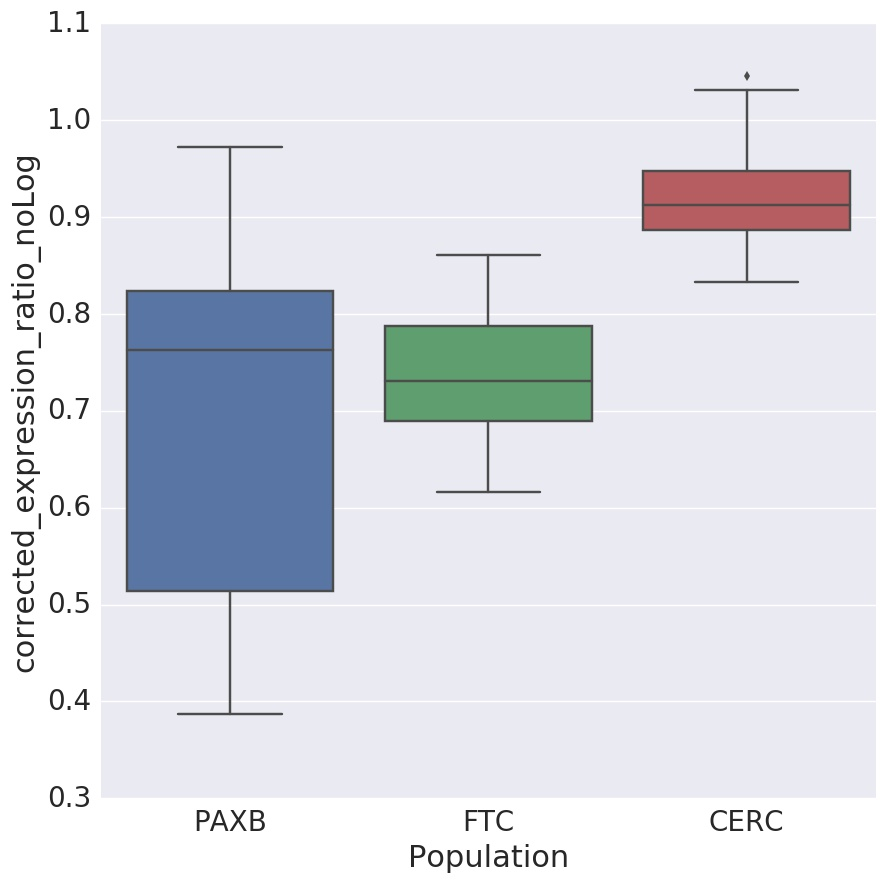

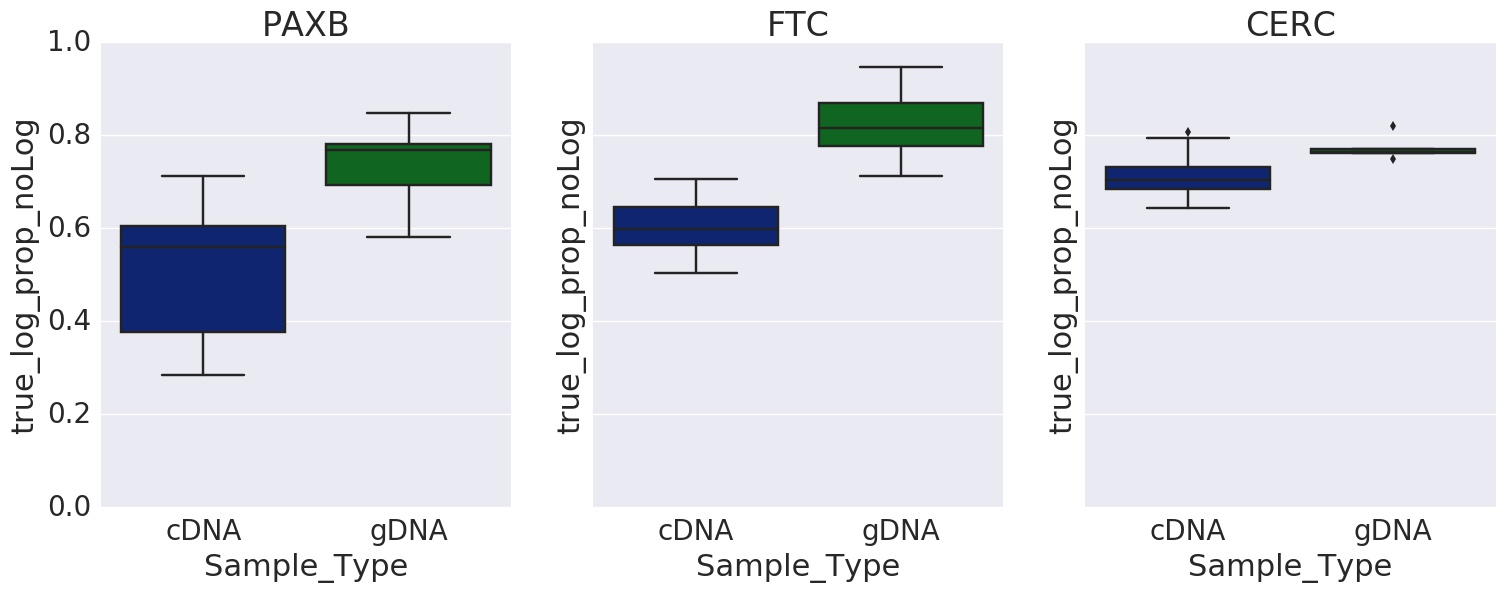

In [13]:
tqmn_1303_W_cDNA = tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='cDNA']
tqmn_1303_W_gDNA = tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='gDNA']

tqmn_1303_W_cDNA = tqmn_1303_W_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
tqmn_1303_W_cDNA['corrected_expression_ratio'] = tqmn_1303_W_cDNA['true_log_prop'] - tqmn_1303_W_gDNA['true_log_prop'].mean()
tqmn_1303_W_cDNA['Population'] = 'PAXB'
tqmn_1303_W_cDNA['corrected_expression_ratio_noLog'] = 2**tqmn_1303_W_cDNA['corrected_expression_ratio']
tqmn_1303_W['true_log_prop_noLog'] = 2**tqmn_1303_W['true_log_prop']

ftc_tqmn_cDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type']=='cDNA']
ftc_tqmn_gDNA = ftc_tqmn.loc[ftc_tqmn['Sample_Type']=='gDNA']

ftc_tqmn_cDNA = ftc_tqmn_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
ftc_tqmn_cDNA['corrected_expression_ratio'] = ftc_tqmn_cDNA['true_log_prop'] - ftc_tqmn_gDNA['true_log_prop'].mean()
ftc_tqmn_cDNA['Population'] = 'FTC'
ftc_tqmn_cDNA['corrected_expression_ratio_noLog']  = 2**ftc_tqmn_cDNA['corrected_expression_ratio'] 
ftc_tqmn['true_log_prop_noLog'] = 2**ftc_tqmn['true_log_prop']

cerc_tqmn_cDNA = cerc_tqmn.loc[cerc_tqmn['Sample_Type']=='cDNA']
cerc_tqmn_gDNA = cerc_tqmn.loc[cerc_tqmn['Sample_Type']=='gDNA']

cerc_tqmn_cDNA = cerc_tqmn_cDNA.loc[:,['RFU1','RFU2','measured_log_prop','true_log_prop','Sample_Type','Sample']]
cerc_tqmn_cDNA['corrected_expression_ratio'] = cerc_tqmn_cDNA['true_log_prop'] - cerc_tqmn_gDNA['true_log_prop'].mean()
cerc_tqmn_cDNA['Population'] = 'CERC'
cerc_tqmn_cDNA['corrected_expression_ratio_noLog'] = 2**cerc_tqmn_cDNA['corrected_expression_ratio'] 
cerc_tqmn['true_log_prop_noLog'] = 2**cerc_tqmn['true_log_prop']


tqmn_combined =  pd.concat([tqmn_1303_W_cDNA, ftc_tqmn_cDNA,cerc_tqmn_cDNA], axis=0)

#print tqmn_combined

#print tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='cDNA']['true_log_prop'].mean()
#print tqmn_1303_W.loc[tqmn_1303_W['Sample_Type']=='gDNA']['true_log_prop'].mean()


md = smf.mixedlm("corrected_expression_ratio ~ Population", data=tqmn_combined, groups=tqmn_combined["Sample"])

mdf = md.fit()

print(mdf.summary())
print(mdf.pvalues)
plt.figure(figsize=(10,10))
sns.boxplot(x='Population',y='corrected_expression_ratio_noLog',data=tqmn_combined)
plt.savefig('Fresh_WT_comb_cDNAonly_noLog.pdf')


f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6),sharey=True)
ax1.set_title('PAXB')
ax2.set_title('FTC')
ax3.set_title('CERC')
ax1.set_ylim([0,1])

#tqmn_1303_W
sns.boxplot(x="Sample_Type", y="true_log_prop_noLog",
              data=tqmn_1303_W,palette='dark',ax=ax1)
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=tqmn_1303_W, groups=tqmn_1303_W["Sample"])

mdf = md.fit()
print(1303)
print(mdf.summary())
print(mdf.pvalues)
sns.boxplot(x="Sample_Type", y="true_log_prop_noLog",
              data=ftc_tqmn,palette='dark',ax=ax2)
md = smf.mixedlm("true_log_prop ~ Sample_Type", data=ftc_tqmn, groups=ftc_tqmn["Sample"])

mdf = md.fit()
print('FTC')
print(mdf.pvalues)
print(mdf.summary())

sns.boxplot(x="Sample_Type", y="true_log_prop_noLog",
              data=cerc_tqmn,palette='dark',ax=ax3)

md = smf.mixedlm("true_log_prop ~ Sample_Type", data=cerc_tqmn, groups=cerc_tqmn["Sample"])

mdf = md.fit()
print('CERC')
print(mdf.summary())
print(mdf.pvalues)
plt.savefig('Fresh_WT_cgDNA_noLog.pdf')

ase
Ttest_indResult(statistic=5.7304549136344933, pvalue=1.2017314733184565e-07)
MannwhitneyuResult(statistic=133.0, pvalue=3.1864598073928689e-10)
NaN   -0.237491
NaN   -0.304148
NaN   -0.338970
NaN   -0.355961
NaN   -0.346150
NaN   -0.301222
NaN   -0.365186
NaN   -0.332337
NaN   -0.518656
NaN   -0.246779
NaN   -0.337885
NaN   -0.378696
NaN   -0.420219
NaN   -0.391728
NaN   -0.356691
NaN   -0.441659
NaN   -0.326483
NaN   -0.389279
NaN   -0.784769
NaN   -0.530483
NaN   -0.549004
NaN   -0.496563
NaN   -0.712296
NaN   -0.647520
Name: true_log_prop, dtype: float64


"\nplt.figure(figsize=(6,6))\nsns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_cDNA,palette = gt_palette)\nplt.figure(figsize=(6,6))\nsns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_cDNA)\n\n\n\nplt.figure(figsize=(20,20))\nsns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_cDNA,palette = gt_palette)\nplt.figure(figsize=(10,10))\nsns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_cDNA)\n\n\n\n\nplt.figure(figsize=(6,6))\nsns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_gDNA,palette = gt_palette)\nplt.figure(figsize=(6,6))\nsns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_gDNA)\n\nwt = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'W','true_log_prop']\nss = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'SS','true_log_prop']\ns30 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'S30','true_log_prop']\ns48 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'S48','true_log_prop']\nl198 = tqmn_1303_cDNA.loc[t

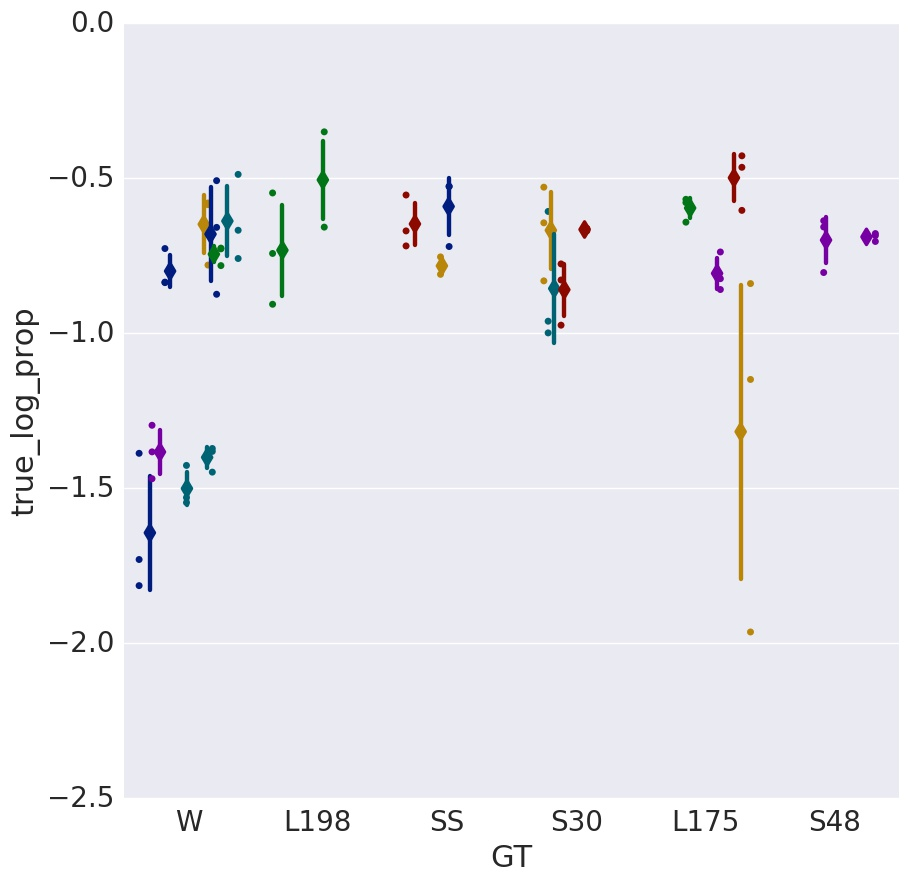

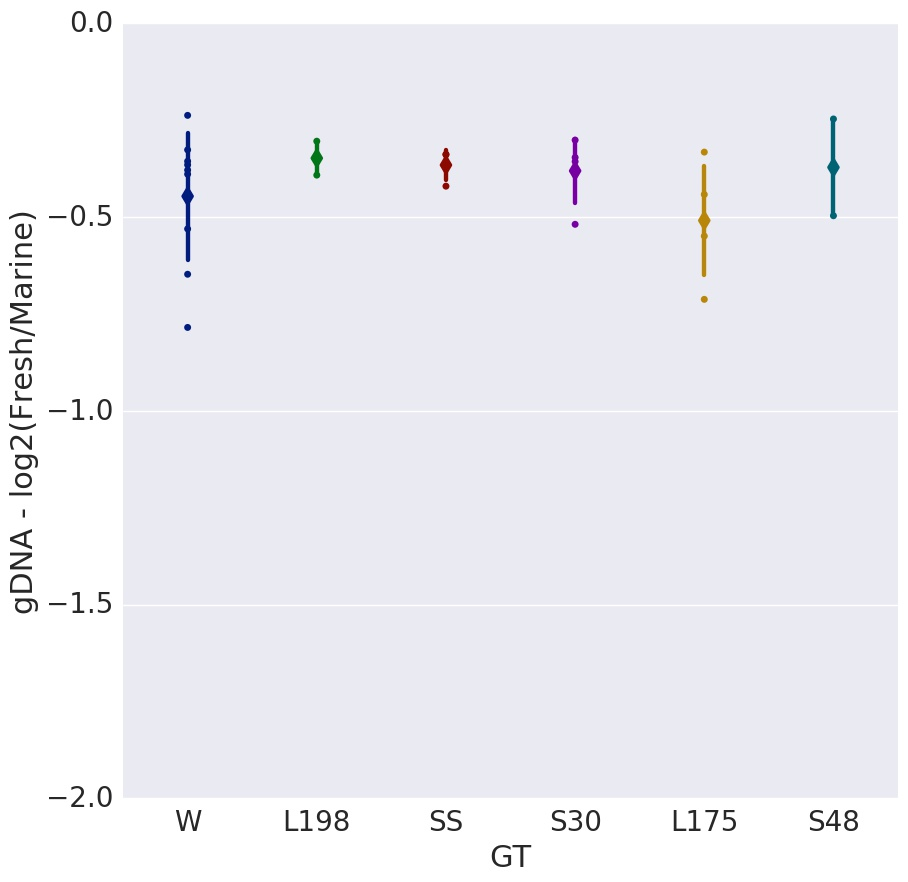

In [10]:
sns.set(font_scale=2) 

tqmn_1303 = pd.read_excel('1303-102017/TG1303_tqmn_102017 -  Allelic Discrimination Results.xlsx')
tqmn_1303['measued_log_prop'] = np.log2(tqmn_1303.RFU2/tqmn_1303.RFU1)
tqmn_1303.head

tqmn_1303 = tqmn_1303.loc[tqmn_1303['RFU1'] > 200]
tqmn_1303 = tqmn_1303.loc[tqmn_1303['RFU2'] > 200]

tqmn_1303.head

tqmn_1303['true_log_prop'] = tqmn_1303['measued_log_prop']/calibrated_slope
tqmn_1303_gDNA = tqmn_1303.loc[tqmn_1303['Sample_Type'] == 'gDNA']
tqmn_1303_cDNA = tqmn_1303.loc[tqmn_1303['Sample_Type'] == 'cDNA']

tqmn_1303_gDNA_ratios = tqmn_1303.loc[tqmn_1303['Sample_Type'] == 'gDNA']['true_log_prop']
tqmn_1303_cDNA_ratios = tqmn_1303.loc[tqmn_1303['Sample_Type'] == 'cDNA']['true_log_prop']
#print tqmn_1303_gDNA_ratios
print 'ase'
print stats.ttest_ind(tqmn_1303_gDNA_ratios,tqmn_1303_cDNA_ratios)
print stats.mannwhitneyu(tqmn_1303_gDNA_ratios,tqmn_1303_cDNA_ratios)


print tqmn_1303_gDNA_ratios
tqmn_1303_W = tqmn_1303.loc[tqmn_1303['GT'] == 'W']


gt_palette = {
    'W' : 'blue',
    'SS' : 'purple',
    'S30' : 'red',
    'S48' : 'red',
    'L175' : 'green',
    'L198' : 'green'
}
plt.figure(figsize=(10,10))
ax=sns.pointplot(x="GT", y="true_log_prop", hue="Sample",
              data=tqmn_1303_cDNA, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')
sns.stripplot(x='GT',y='true_log_prop',hue='Sample',
              data=tqmn_1303_cDNA,dodge=True,palette='dark')

ax.legend_.remove()


plt.figure(figsize=(10,10))
ax=sns.pointplot(x="GT", y="true_log_prop", 
              data=tqmn_1303_gDNA, dodge=True,palette='dark', join=False,
              markers="d",ci ='sd')
ax.set_ylim((-2,0))
ax.set_ylabel('cDNA - log2(Fresh/Marine)')
ax=sns.stripplot(x="GT", y="true_log_prop", 
             data=tqmn_1303_gDNA, dodge=True,palette='dark')
ax.set_ylabel('gDNA - log2(Fresh/Marine)')
ax.set_ylim((-2,0))

'''
plt.figure(figsize=(6,6))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_cDNA,palette = gt_palette)
plt.figure(figsize=(6,6))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_cDNA)



plt.figure(figsize=(20,20))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_cDNA,palette = gt_palette)
plt.figure(figsize=(10,10))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_cDNA)




plt.figure(figsize=(6,6))
sns.stripplot(x='Sample',y='true_log_prop',hue='GT',data=tqmn_1303_gDNA,palette = gt_palette)
plt.figure(figsize=(6,6))
sns.boxplot(x='GT',y='true_log_prop',hue='Sample',data=tqmn_1303_gDNA)

wt = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'W','true_log_prop']
ss = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'SS','true_log_prop']
s30 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'S30','true_log_prop']
s48 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'S48','true_log_prop']
l198 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'L198','true_log_prop']
l175 = tqmn_1303_cDNA.loc[tqmn_1303_cDNA['GT'] == 'L175','true_log_prop']

print stats.f_oneway(ss,s30,s48,l198,l175)
'''